# практическая работа

программа для анализа продаж

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
# генерю данные о продажах
np.random.seed(42)

n = 500  # кол-во продаж
categories = ['электроника', 'одежда', 'книги', 'еда']

df = pd.DataFrame({
    'категория': np.random.choice(categories, n),
    'цена': np.random.uniform(100, 5000, n),
    'кол-во': np.random.randint(1, 4, n)
})

df['сумма'] = df['цена'] * df['кол-во']

print(f"всего {len(df)} записей")
df.head()

всего 500 записей


,категория,цена,кол-во,сумма
0,книги,1542.799571,3,4628.398713
1,еда,1986.978870,2,3973.957740
2,электроника,4270.569690,2,8541.139381
3,книги,1652.917825,3,4958.753476
4,книги,930.514459,3,2791.543376


In [19]:
# статистика pandas
print(df.describe())

total = df['сумма'].sum()
avg = df['сумма'].mean()

print(f"\nитого выручка: {total:,.0f} руб")
print(f"средний чек: {avg:,.0f} руб")

              цена      кол-во         сумма
count   500.000000  500.000000    500.000000
mean   2534.199608    2.012000   4882.498601
std    1434.704838    0.820489   3374.075287
min     153.104492    1.000000    170.528094
25%    1300.921019    1.000000   2189.885868
50%    2564.348789    2.000000   4278.493992
75%    3781.109973    3.000000   7106.338094
max    4998.616599    3.000000  14801.774157

итого выручка: 2,441,249 руб
средний чек: 4,882 руб


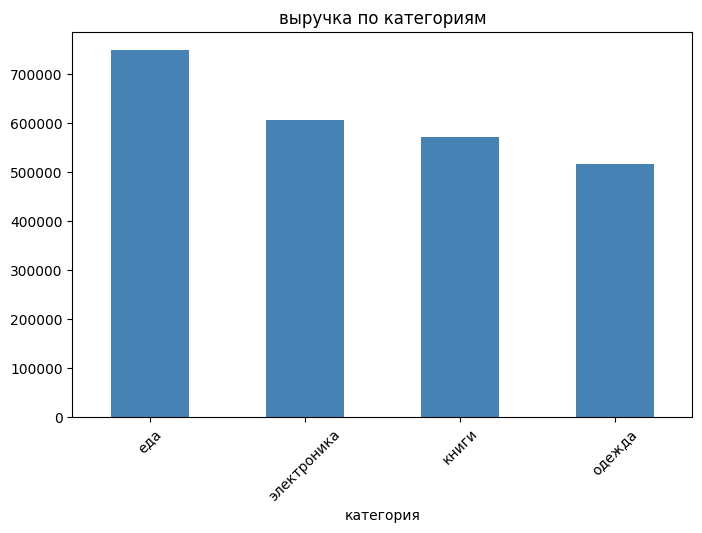

категория
еда            747896.501797
электроника    605321.102912
книги          571526.951467
одежда         516504.744432
Name: сумма, dtype: float64


In [20]:
# по категориям
cat_sum = df.groupby('категория')['сумма'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
cat_sum.plot(kind='bar', color='steelblue')
plt.title('выручка по категориям')
plt.xticks(rotation=45)
plt.show()

print(cat_sum)

In [21]:
# расчеты numpy
arr = df['сумма'].values

print("статистика numpy:")
print(f"среднее: {np.mean(arr):,.0f}")
print(f"медиана: {np.median(arr):,.0f}") 
print(f"мин: {np.min(arr):,.0f}")
print(f"макс: {np.max(arr):,.0f}")
print(f"std: {np.std(arr):,.0f}")

# квартили
q25, q75 = np.percentile(arr, [25, 75])
print(f"\nQ1: {q25:,.0f}")
print(f"Q3: {q75:,.0f}")

статистика numpy:
среднее: 4,882
медиана: 4,278
мин: 171
макс: 14,802
std: 3,371

Q1: 2,190
Q3: 7,106


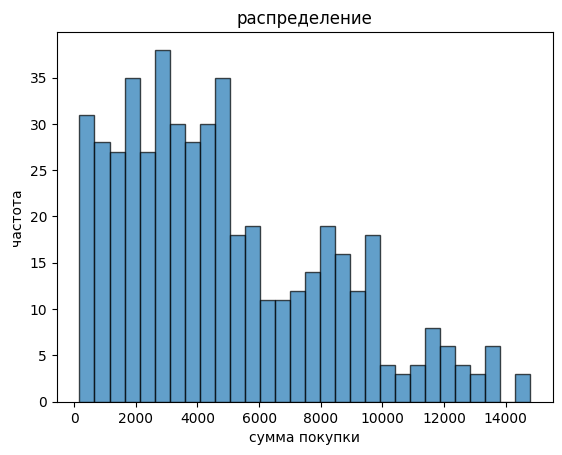

In [22]:
# гистограмма
plt.hist(df['сумма'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('сумма покупки')
plt.ylabel('частота')
plt.title('распределение')
plt.show()

                     сумма                   
                       sum         mean count
категория                                    
еда          747896.501797  5053.354742   148
книги        571526.951467  4684.647143   122
одежда       516504.744432  4782.451337   108
электроника  605321.102912  4961.648385   122


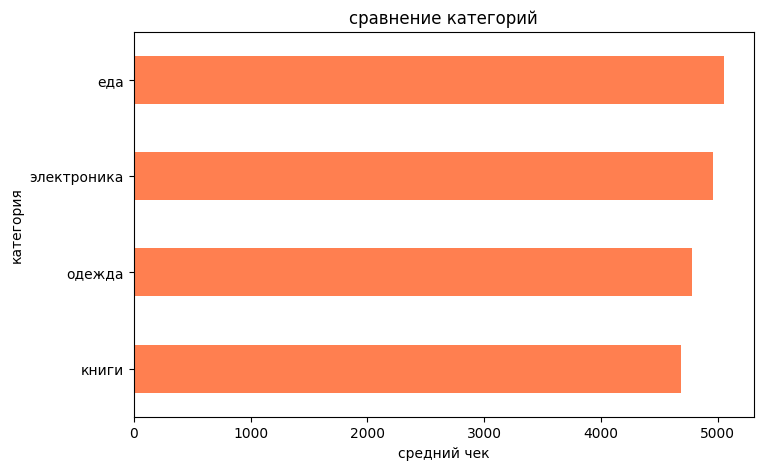

In [23]:
# сравниваем категории
stats_by_cat = df.groupby('категория').agg({
    'сумма': ['sum', 'mean', 'count']  
})

print(stats_by_cat)

# средний чек
avg_by_cat = df.groupby('категория')['сумма'].mean().sort_values()

plt.figure(figsize=(8,5))
avg_by_cat.plot(kind='barh', color='coral')
plt.xlabel('средний чек')
plt.title('сравнение категорий')
plt.show()

In [24]:
# поиск выбросов через numpy
data = df['сумма'].values

mean = np.mean(data)
std = np.std(data)

# аномалии - отклонение больше 2 std
outliers = data[data > mean + 2*std]

print(f"найдено {len(outliers)} выбросов")
print(f"порог: {mean + 2*std:,.0f}")

if len(outliers) > 0:
    print(f"\nсамые большие:")
    for val in np.sort(outliers)[-5:]:
        print(f"  {val:,.0f}")

найдено 25 выбросов
порог: 11,624

самые большие:
  13,609
  13,623
  14,549
  14,794
  14,802


In [25]:
# итого
print("="*50)
print("ИТОГ")
print("="*50)

print(f"\nвсего продаж: {len(df)}")
print(f"общая выручка: {df['сумма'].sum():,.0f} руб")

best_cat = df.groupby('категория')['сумма'].sum().idxmax()
print(f"лучшая категория: {best_cat}")

print(f"\nиспользовал numpy, pandas, matplotlib")
print("программа работает")

ИТОГ

всего продаж: 500
общая выручка: 2,441,249 руб
лучшая категория: еда

использовал numpy, pandas, matplotlib
программа работает
